In [75]:
#Import header libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [76]:
#Load the file to our dataframe 'df'
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [77]:
#Check the shape of df
df.shape
#There are 39717 rows and 111 columns. This is a huge dataset.

(39717, 111)

In [78]:
#Check some sample to see how the data looks
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [79]:
#Check for duplicate data:
len(df.id.unique())
#There are no duplicate records

39717

In [80]:
#Check for null values in each column
df.isnull().sum()
#There are a lot of columns having null values

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [81]:
#Check for null values percentage:
round(100*(df.isnull().sum()/len(df.id)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [82]:
#We observe that a lot of columns have null values
#Let's calculate how many columns have null values greater than 30%
nullpercent = round(100*(df.isnull().sum()/len(df.id)), 2)
len(list(nullpercent[nullpercent>=30.00].index))

58

In [83]:
#Let's remove all these columns that have more than 30% null values as these won't be useful for our results.

In [84]:
#Dropping these columns from our df:
df = df.drop(list(nullpercent[nullpercent>=30.00].index),axis=1)

In [85]:
#Check the shape of the dataframe
df.shape
#Now we are left with 53 columns

(39717, 53)

In [86]:
#Check if rows have more than 5 missing values
len(df[df.isnull().sum(axis=1) > 5].index)

0

In [87]:
#There are no rows with more than 5 missing values

In [88]:
#Check the data type for formatting issues:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [89]:
#Currently, int_rate is not in float type. Changing the type for int_rate to float
df['int_rate']=df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [90]:
#Check the interest rate type
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [91]:
#Currently employee length is in the format '10 years', 1 year etc'. Let's convert employee length to numeric for our analysis:
df['emp_length'] = df['emp_length'].str.replace("n/a", "")
df = df[~df['emp_length'].isnull()]
df['emp_length'] = pd.to_numeric(df['emp_length'].str.strip(' years').apply(lambda x: 0 if x=='< 1' else (10 if x=='10+' else x)))

In [92]:
#Check if emp_length is updated
df['emp_length']

0        10
1         0
2        10
3        10
4         1
5         3
6         8
7         9
8         4
9         0
10        5
11       10
12        0
13        3
14        3
15        0
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        0
         ..
39687     9
39688     6
39689     0
39690     3
39691     1
39692     1
39693     0
39694     8
39695     7
39696     2
39697     0
39698     1
39699     4
39700     0
39701     7
39702     1
39703     2
39704     0
39705     8
39706     0
39707     2
39708     4
39709     0
39710     1
39711     5
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38642, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [94]:
#Now let's start our analysing by utilising the set of variables we have 

In [95]:
#Now we see that we have a lot of variables available. However, not all can be used. Reasons listed as below:
#1) We need to identify that when company receives a loan application, which factors should affect the approval/decision of the application.
#2) Not all variables can be available during the time of application (Eg. inq_last_6mths, mths_since_last_delinq etc.), only a limited set of variables can be used.

df = df[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
                 'verification_status', 'issue_d', 'loan_status', 
                 'purpose', 'addr_state', 'dti']]


In [96]:
#Check the shape of our df
df.shape
df.head(5)
#Now we are left with 14 columns that are useful

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,36 months,10.65,B,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,36 months,15.96,C,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,36 months,13.49,C,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,60 months,12.69,B,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [97]:
#Change the date to correct format
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce', format='%b-%y', dayfirst=True)
#Derive new variables
df['issue_yr']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_yr,issue_month
0,5000,5000,36 months,10.65,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,2011,12
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,2011,12
2,2400,2400,36 months,15.96,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2011,12
3,10000,10000,36 months,13.49,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,2011,12
4,3000,3000,60 months,12.69,B,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,2011,12


In [98]:
#Calculate the data lost:
round(len(df.index)/39717,2)

0.97

In [99]:
# Check the 'Charged off' data:
round(100*df.groupby('loan_status').size()/len(df),2)
#Approx 14% customers defaulted.

loan_status
Charged Off    13.97
Current         2.84
Fully Paid     83.19
dtype: float64

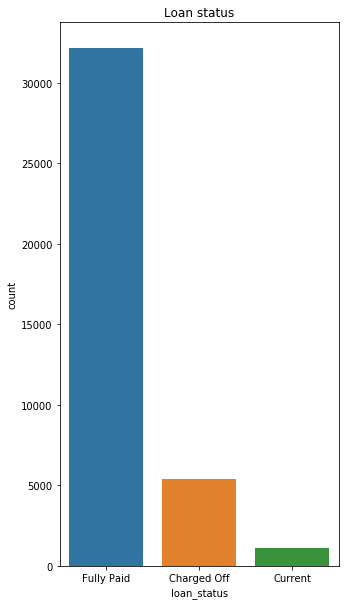

In [100]:
#Let's plot a graph for the same
plt.title('Loan status')
sns.countplot(df['loan_status'])
plt.show()

In [101]:
#Check the percentage of defaulters in each year:
ChargedOff=df[df['loan_status']=='Charged Off']
round(100*ChargedOff.groupby('issue_yr').size()/len(ChargedOff),2).reset_index(name='Percentage').sort_values('Percentage',ascending=True)

#We see that percentage of Charged Off cases increased in each year

,issue_yr,Percentage
0,2007,0.83
1,2008,4.57
2,2009,11.00
3,2010,26.13
4,2011,57.46


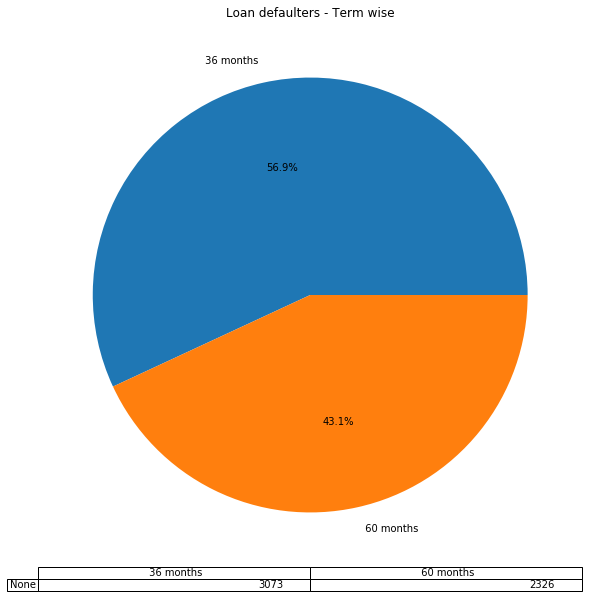

In [102]:
#UNIVARIATE ANALYSIS
# Creating a pie-chart for the defaults 'term'-wise
ChargedOff.groupby(['term']).size().plot(kind="pie",figsize=(10, 10),table=True,autopct='%1.1f%%',title="Loan defaulters - Term wise")
plt.ylabel("")
plt.show()

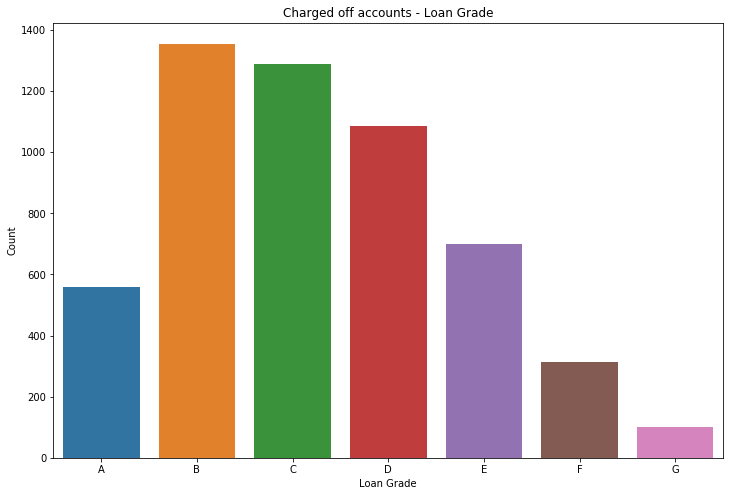

In [103]:
# Charged Off accounts with respect to loan grade
alphabetical = ["A", "B", "C", "D", "E", "F", "G"]
plt.figure(figsize=(12, 8))
plt.title('Charged off accounts - Loan Grade')
ax = sns.countplot(x = "grade", data = ChargedOff, order=alphabetical);
ax.set(xlabel='Loan Grade', ylabel='Count')
plt.show()
#Loan grades B, C are the highest among all


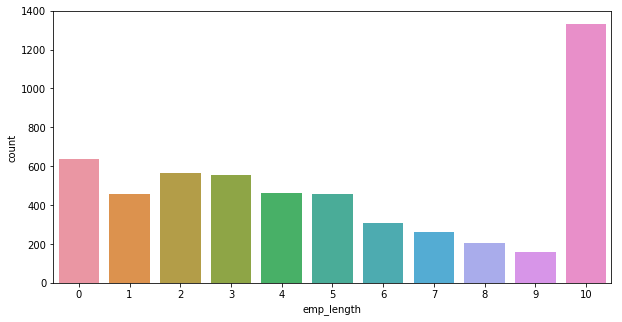

In [104]:
# Creating a barchart for 'emp_length'
plt.figure(figsize=(10,5))
sns.countplot(ChargedOff['emp_length'], order=sorted(ChargedOff.emp_length.unique()))
plt.show()
#Customers with employement length of 10 or less than 1 default the most.


In [105]:
#We can define a function to plot loan_status across different variables now.
def plotdefine(myvar):
    from pylab import rcParams
    rcParams['figure.figsize'] = 8, 5
    ax = sns.countplot(x = myvar, data = ChargedOff)
    plt.show()

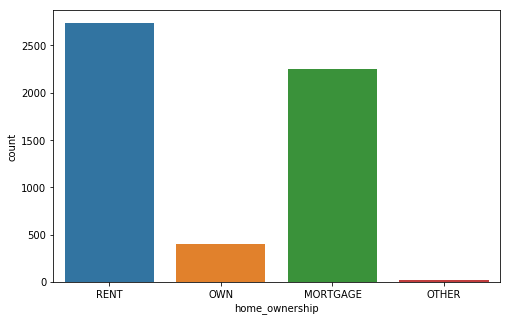

In [106]:
#Plot a chart for home_ownership
plotdefine('home_ownership')
#Rent and Mortgage customers show the highest number of defaults

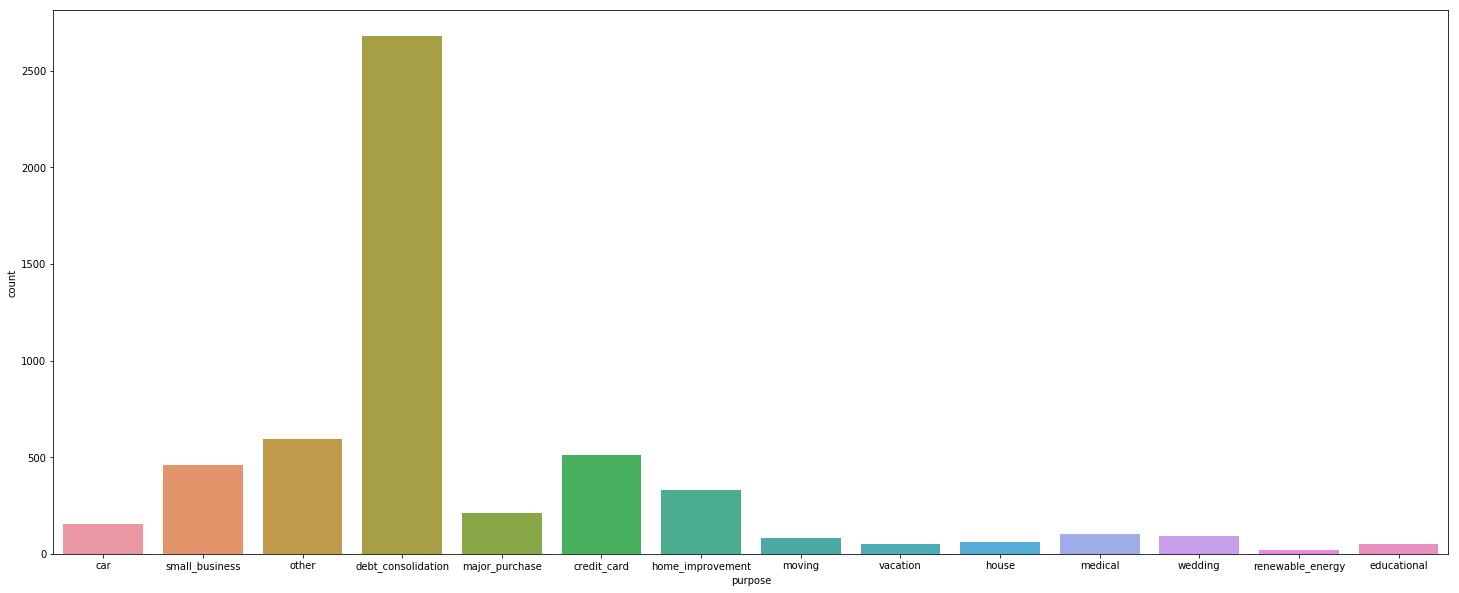

In [107]:
#Plot a chart for purposes
fig, ax = plt.subplots(figsize=(25, 10))
plotdefine('purpose')
#Debt Consolidation, Other, Credit Card and Small Business have the most number of defaults.

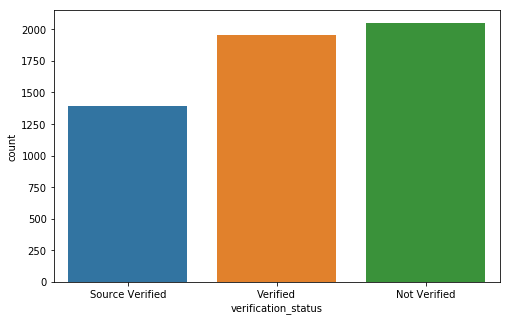

In [108]:
#Plot a chart for verification_status
plotdefine("verification_status")
#Not Verified category has the most number of defaults.
#Surprisingly, even the Verified category has high number of defaults

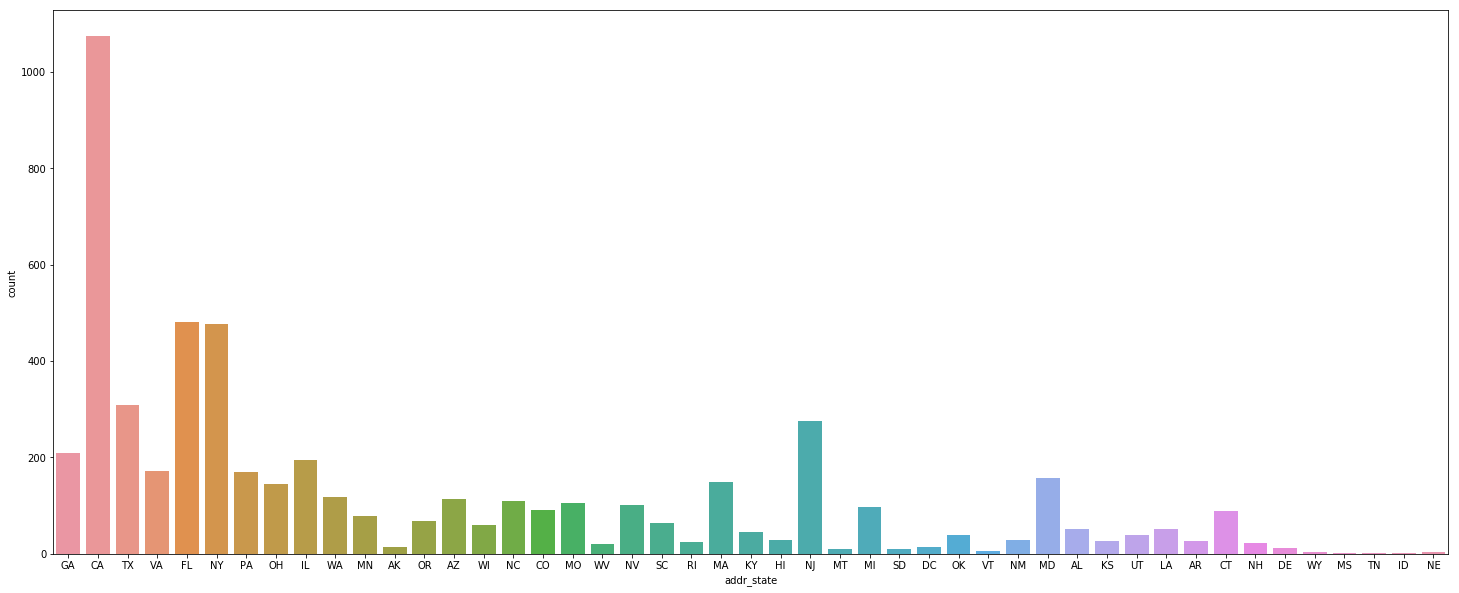

In [109]:
#Plot a chart for Address state to see which states have highest no. of defaulters
fig, ax = plt.subplots(figsize=(25, 10))
#Address state:
plotdefine('addr_state')
#CA, FL, NY, TX, NJ have high number of defaults

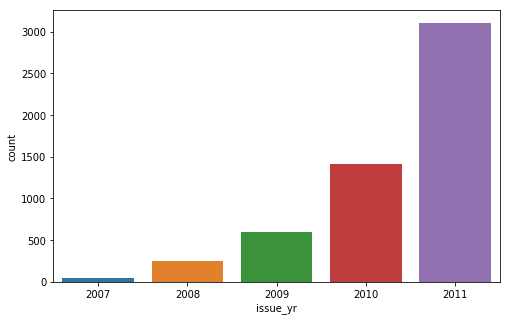

In [110]:
#Check the no. of defaulteres per year
plotdefine('issue_yr')

In [111]:
#Check the defaulters based on loan amount:
def loan_amount(n):
    if n < 6000:
        return 'Low'
    elif n >=15000 and n < 25000:
        return 'Medium'
    else:
        return 'High'
        
ChargedOff['loan_amount_range'] = ChargedOff['loan_amnt'].apply(lambda x: loan_amount(x))

In [112]:
ChargedOff.tail()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_yr,issue_month,loan_amount_range
39667,2500,2500,36 months,12.80,D,0,MORTGAGE,32000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,2007,8,Low
39668,2500,2500,36 months,9.64,B,0,MORTGAGE,75000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,2007,8,Low
39669,6500,6500,36 months,15.01,F,9,MORTGAGE,213000.0,Not Verified,2007-08-01,Charged Off,small_business,GA,6.45,2007,8,High
39678,1000,1000,36 months,10.59,C,2,MORTGAGE,33990.0,Not Verified,2007-08-01,Charged Off,wedding,VA,14.47,2007,8,Low
39688,20000,20000,36 months,13.43,E,6,MORTGAGE,145000.0,Not Verified,2007-08-01,Charged Off,credit_card,FL,10.15,2007,8,Medium


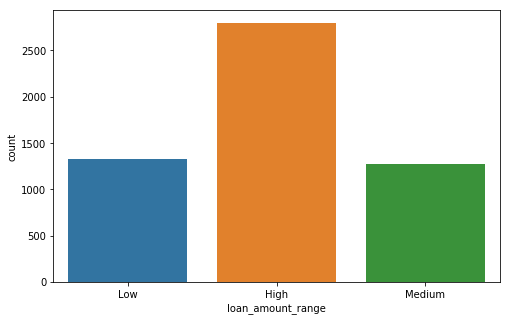

In [113]:
#Plot a chart based on the loan amount's range
plotdefine('loan_amount_range')
#Loans that have high amounts have most no. of defaulters

In [114]:
#Create different bins for the interest rates for easy comparison
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=13:
        return 'medium'
    else:
        return 'high'    
ChargedOff['int_rate_range'] = ChargedOff['int_rate'].apply(lambda x: int_rate(x))

In [115]:
#Check the ChargedOff df again
ChargedOff.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_yr,issue_month,loan_amount_range,int_rate_range
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,2011,12,Low,high
8,5600,5600,60 months,21.28,F,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,2011,12,Low,high
9,5375,5375,60 months,12.69,B,0,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,2011,12,Low,medium
12,9000,9000,36 months,13.49,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,VA,10.08,2011,12,High,high
14,10000,10000,36 months,10.65,B,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,CA,7.06,2011,12,High,medium


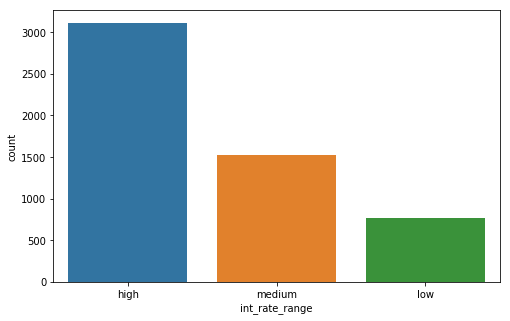

In [116]:
#Plot a graph for interest rate's range
plotdefine('int_rate_range')
#Interest rate - High has the highest number of defaulters

In [117]:
#Create bins for for debt to income ratio:

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
ChargedOff['dti_range'] = ChargedOff['dti'].apply(lambda x: dti(x))

In [118]:
#Check the df again
ChargedOff.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_yr,issue_month,loan_amount_range,int_rate_range,dti_range
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,2011,12,Low,high,low
8,5600,5600,60 months,21.28,F,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,2011,12,Low,high,low
9,5375,5375,60 months,12.69,B,0,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,2011,12,Low,medium,high
12,9000,9000,36 months,13.49,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,VA,10.08,2011,12,High,high,medium
14,10000,10000,36 months,10.65,B,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,CA,7.06,2011,12,High,medium,low


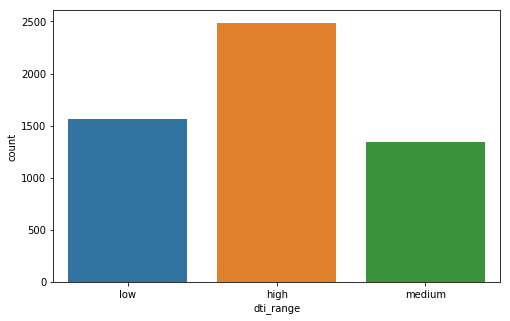

In [119]:
#Plot a graph for dti range
plotdefine('dti_range')
#High dti range has most no. of defaulters

In [120]:
#Binning the funded amount:

def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=10000:
        return 'medium'
    else:
        return 'high'
    
ChargedOff['funded_amnt_range'] = ChargedOff['funded_amnt'].apply(lambda x: funded_amount(x))

In [121]:
#Check the df again
ChargedOff.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_yr,issue_month,loan_amount_range,int_rate_range,dti_range,funded_amnt_range
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,2011,12,Low,high,low,low
8,5600,5600,60 months,21.28,F,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,2011,12,Low,high,low,medium
9,5375,5375,60 months,12.69,B,0,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,2011,12,Low,medium,high,medium
12,9000,9000,36 months,13.49,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,VA,10.08,2011,12,High,high,medium,medium
14,10000,10000,36 months,10.65,B,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,CA,7.06,2011,12,High,medium,low,medium


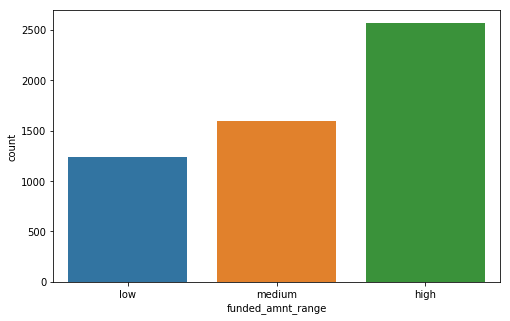

In [122]:
#Create plot for funded amount's rangeplotdefine('funded_amnt_range')
plotdefine('funded_amnt_range')
#For high funded amount, there are maximum no. of defaulters

In [123]:
#Create bins for the annual income
def annual_income(n):
    if n <= 50000:
        return 'Low'
    elif n > 50000 and n <=100000:
        return 'Medium'
    else:
        return 'High'

ChargedOff['annual_inc_range'] = ChargedOff['annual_inc'].apply(lambda x: annual_income(x))
ChargedOff.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,purpose,addr_state,dti,issue_yr,issue_month,loan_amount_range,int_rate_range,dti_range,funded_amnt_range,annual_inc_range
1,2500,2500,60 months,15.27,C,0,RENT,30000.0,Source Verified,2011-12-01,...,car,GA,1.00,2011,12,Low,high,low,low,Low
8,5600,5600,60 months,21.28,F,4,OWN,40000.0,Source Verified,2011-12-01,...,small_business,CA,5.55,2011,12,Low,high,low,medium,Low
9,5375,5375,60 months,12.69,B,0,RENT,15000.0,Verified,2011-12-01,...,other,TX,18.08,2011,12,Low,medium,high,medium,Low
12,9000,9000,36 months,13.49,C,0,RENT,30000.0,Source Verified,2011-12-01,...,debt_consolidation,VA,10.08,2011,12,High,high,medium,medium,Low
14,10000,10000,36 months,10.65,B,3,RENT,100000.0,Source Verified,2011-12-01,...,other,CA,7.06,2011,12,High,medium,low,medium,Medium


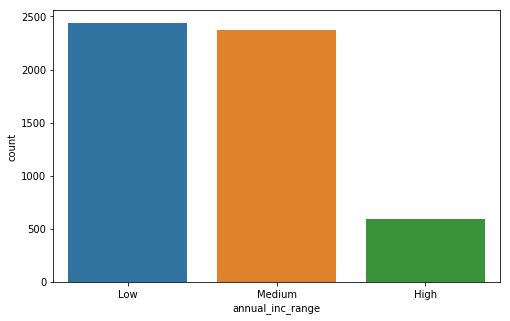

In [124]:
#Plot a graph for annual income range

plotdefine('annual_inc_range')
#Customers that have low income default the most.

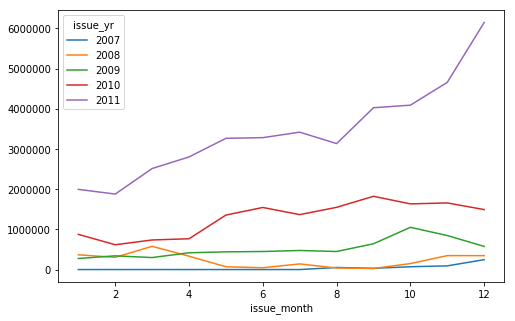

In [125]:
#BIVARIATE ANALYSIS
#Plot a graph to show the defaulters rate year by year based on the loan amount 
pv = pd.pivot_table(ChargedOff, index=ChargedOff.issue_month, columns=ChargedOff.issue_yr, values='loan_amnt', aggfunc='sum', fill_value=0)
pv.plot()
plt.show()
#2011 is the year with maximum no. of defaulters based on the loan amount

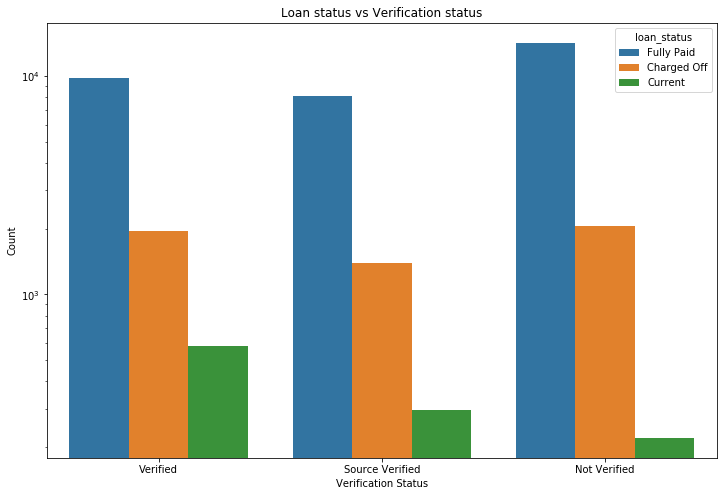

In [126]:
#BIVARIATE ANALYSIS
# Let's plot a graph against Loan status and Verification status
plt.figure(figsize=(12, 8))
plt.title('Loan status vs Verification status')
ax = sns.countplot(x = "verification_status", hue="loan_status", data = df);
ax.set(xlabel='Verification Status', ylabel='Count')
ax.set(yscale="log")
plt.show()

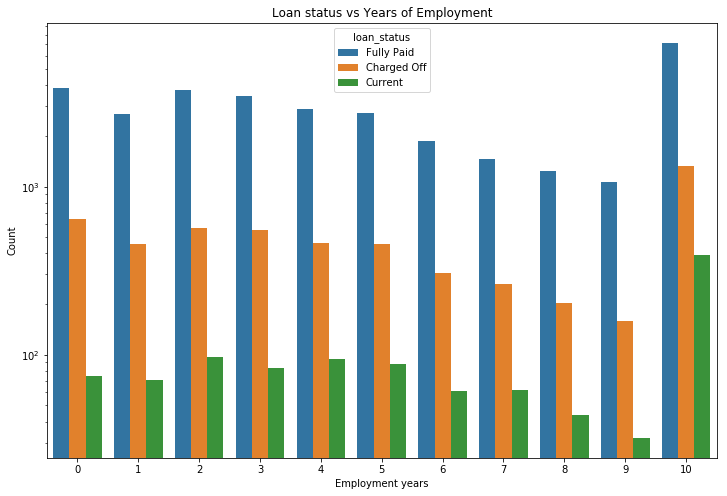

In [127]:
#Plot a graph against Loan status and employement years
plt.figure(figsize=(12, 8))
plt.title('Loan status vs Years of Employment')
ax = sns.countplot(x = "emp_length", hue="loan_status", data = df);
ax.set(xlabel='Employment years', ylabel='Count')
ax.set(yscale="log")
plt.show()

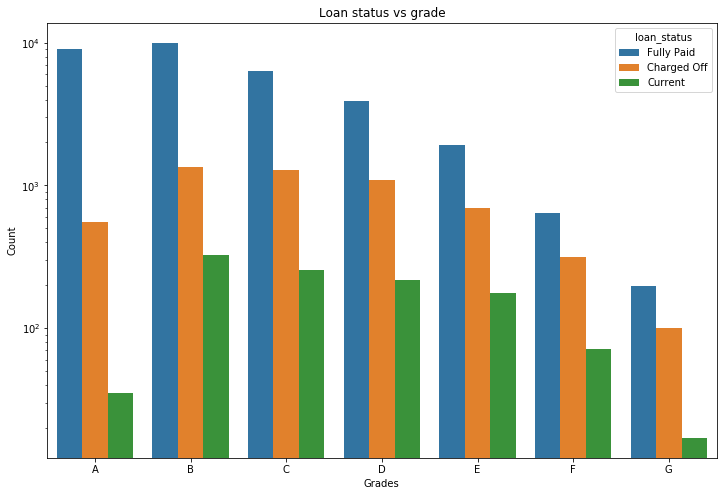

In [128]:
#Plot a graph against Loan status vs Grade
plt.figure(figsize=(12, 8))
plt.title('Loan status vs grade')
ax = sns.countplot(x = "grade", hue="loan_status", data = df, order=alphabetical);
ax.set(xlabel='Grades', ylabel='Count')
ax.set(yscale="log")
plt.show()

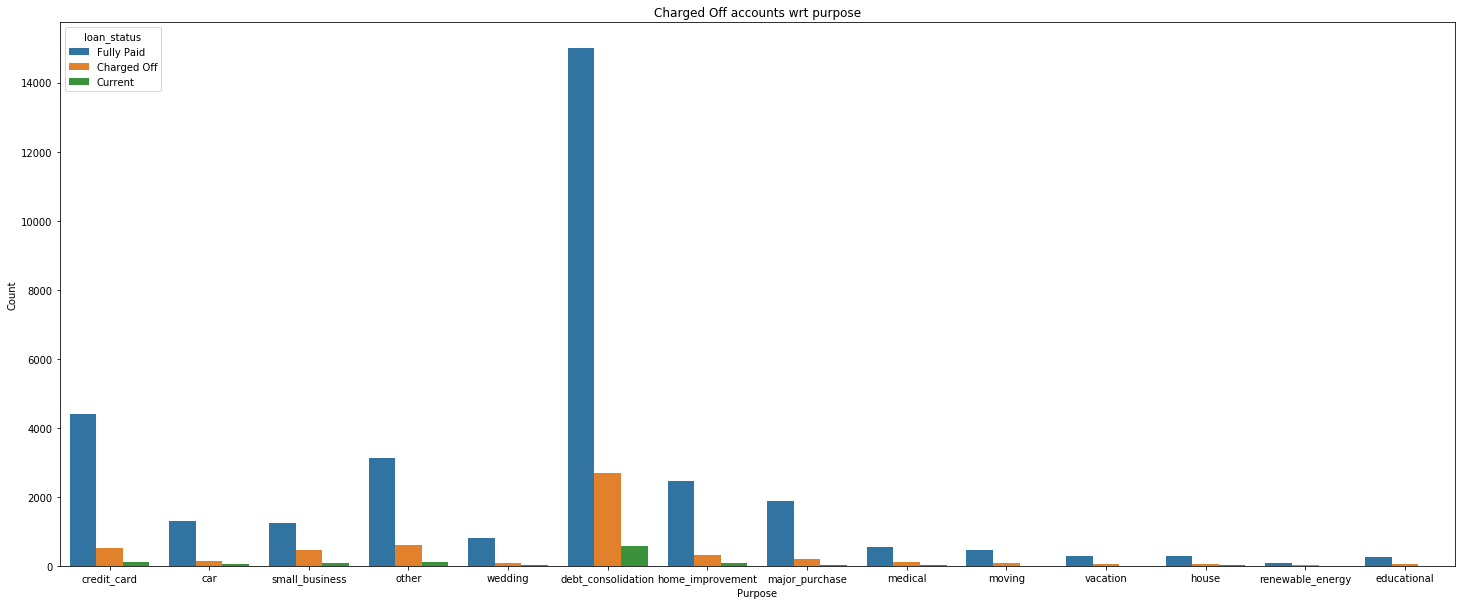

In [129]:
#Plot a graph against loan status and purpose
plt.figure(figsize=(25, 10))
plt.title('Charged Off accounts wrt purpose')
ax = sns.countplot(x = "purpose", hue="loan_status", data = df);
ax.set(xlabel='Purpose', ylabel='Count')
plt.show()

In [132]:
#Plotted the heat map for loan amount (Status - All ) vs rest 
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '800px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '120px', 'font-size': '12pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,loan_amnt,funded_amnt,int_rate,emp_length,annual_inc,dti,issue_yr,issue_month
loan_amnt,1,0.98,0.31,0.16,0.27,0.065,0.13,0.068
funded_amnt,0.98,1,0.31,0.15,0.26,0.065,0.14,0.058
int_rate,0.31,0.31,1,0.0067,0.05,0.11,0.061,0.041
emp_length,0.16,0.15,0.0067,1,0.11,0.053,0.12,0.026
annual_inc,0.27,0.26,0.05,0.11,1,-0.12,0.015,0.011
dti,0.065,0.065,0.11,0.053,-0.12,1,0.097,0.016
issue_yr,0.13,0.14,0.061,0.12,0.015,0.097,1,-0.022
issue_month,0.068,0.058,0.041,0.026,0.011,0.016,-0.022,1


In [131]:
#Plotted the heat map for loan amount (Status - Charged offf ) vs rest 
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Function to magnify the heat map
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '800px'),
                        ('font-size', '12pt')])
]


ChargedOff.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '120px', 'font-size': '12pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,loan_amnt,funded_amnt,int_rate,emp_length,annual_inc,dti,issue_yr,issue_month
loan_amnt,1,0.98,0.34,0.19,0.35,0.065,0.13,0.07
funded_amnt,0.98,1,0.35,0.19,0.34,0.062,0.14,0.069
int_rate,0.34,0.35,1,0.043,0.13,0.045,0.19,0.081
emp_length,0.19,0.19,0.043,1,0.14,0.058,0.12,0.0058
annual_inc,0.35,0.34,0.13,0.14,1,-0.089,-0.014,0.0098
dti,0.065,0.062,0.045,0.058,-0.089,1,0.098,0.035
issue_yr,0.13,0.14,0.19,0.12,-0.014,0.098,1,-0.0028
issue_month,0.07,0.069,0.081,0.0058,0.0098,0.035,-0.0028,1
